In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# Context

In [2]:
tit_data = pd.read_csv('train.csv')
tit_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S



# Data quality assessment

In [3]:
tit_data.shape

(100000, 12)

In [4]:
tit_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# the "PassengerId" column is not really informative, we'll drop it
tit_data = tit_data.drop('PassengerId', axis = 1)

In [6]:
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ MB


In [7]:
# check for duplicates
duplicates = tit_data.duplicated()
duplicates.sum()

0

In [8]:
# check the sum of NaN values for each column
pd.isna(tit_data).sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

<AxesSubplot:>

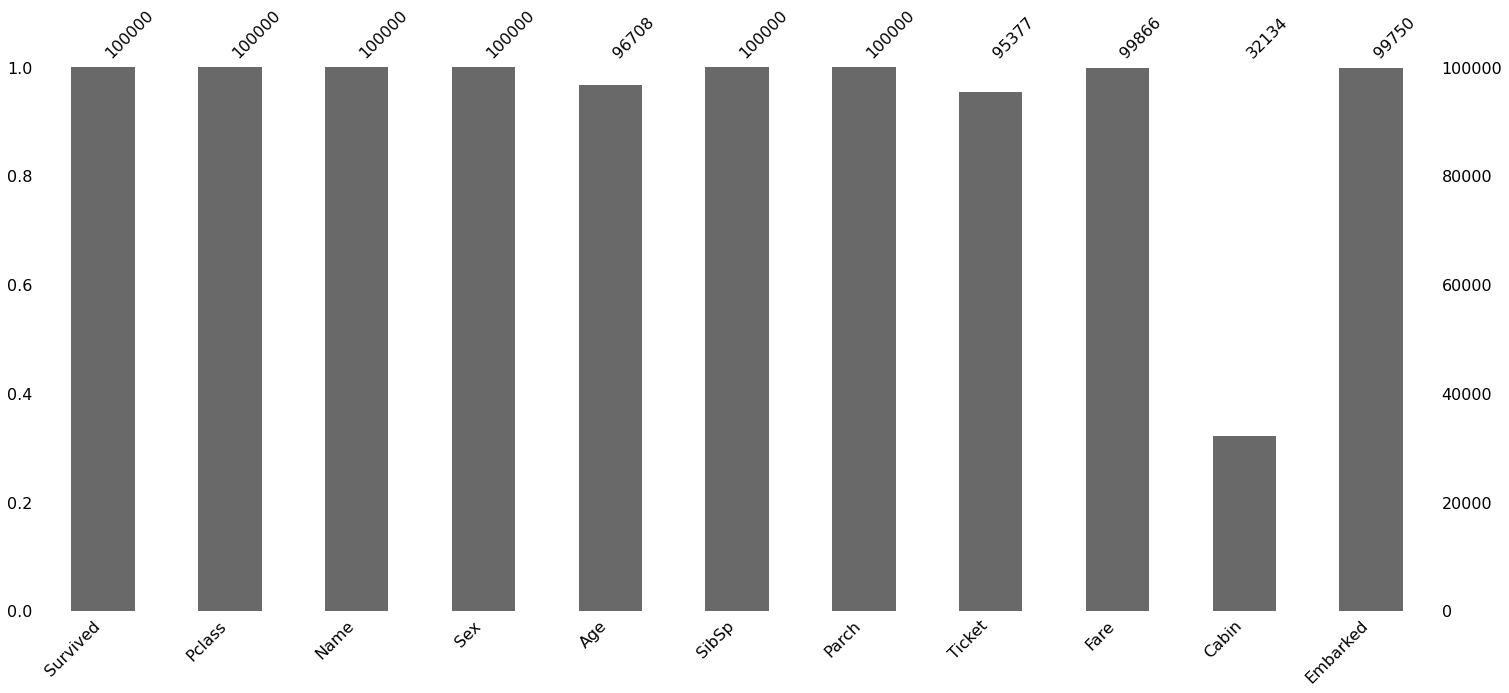

In [9]:
# visualization of NaN values by column (the height of a bar indicates how many NaN values are present in a column)
msno.bar(tit_data)

<AxesSubplot:>

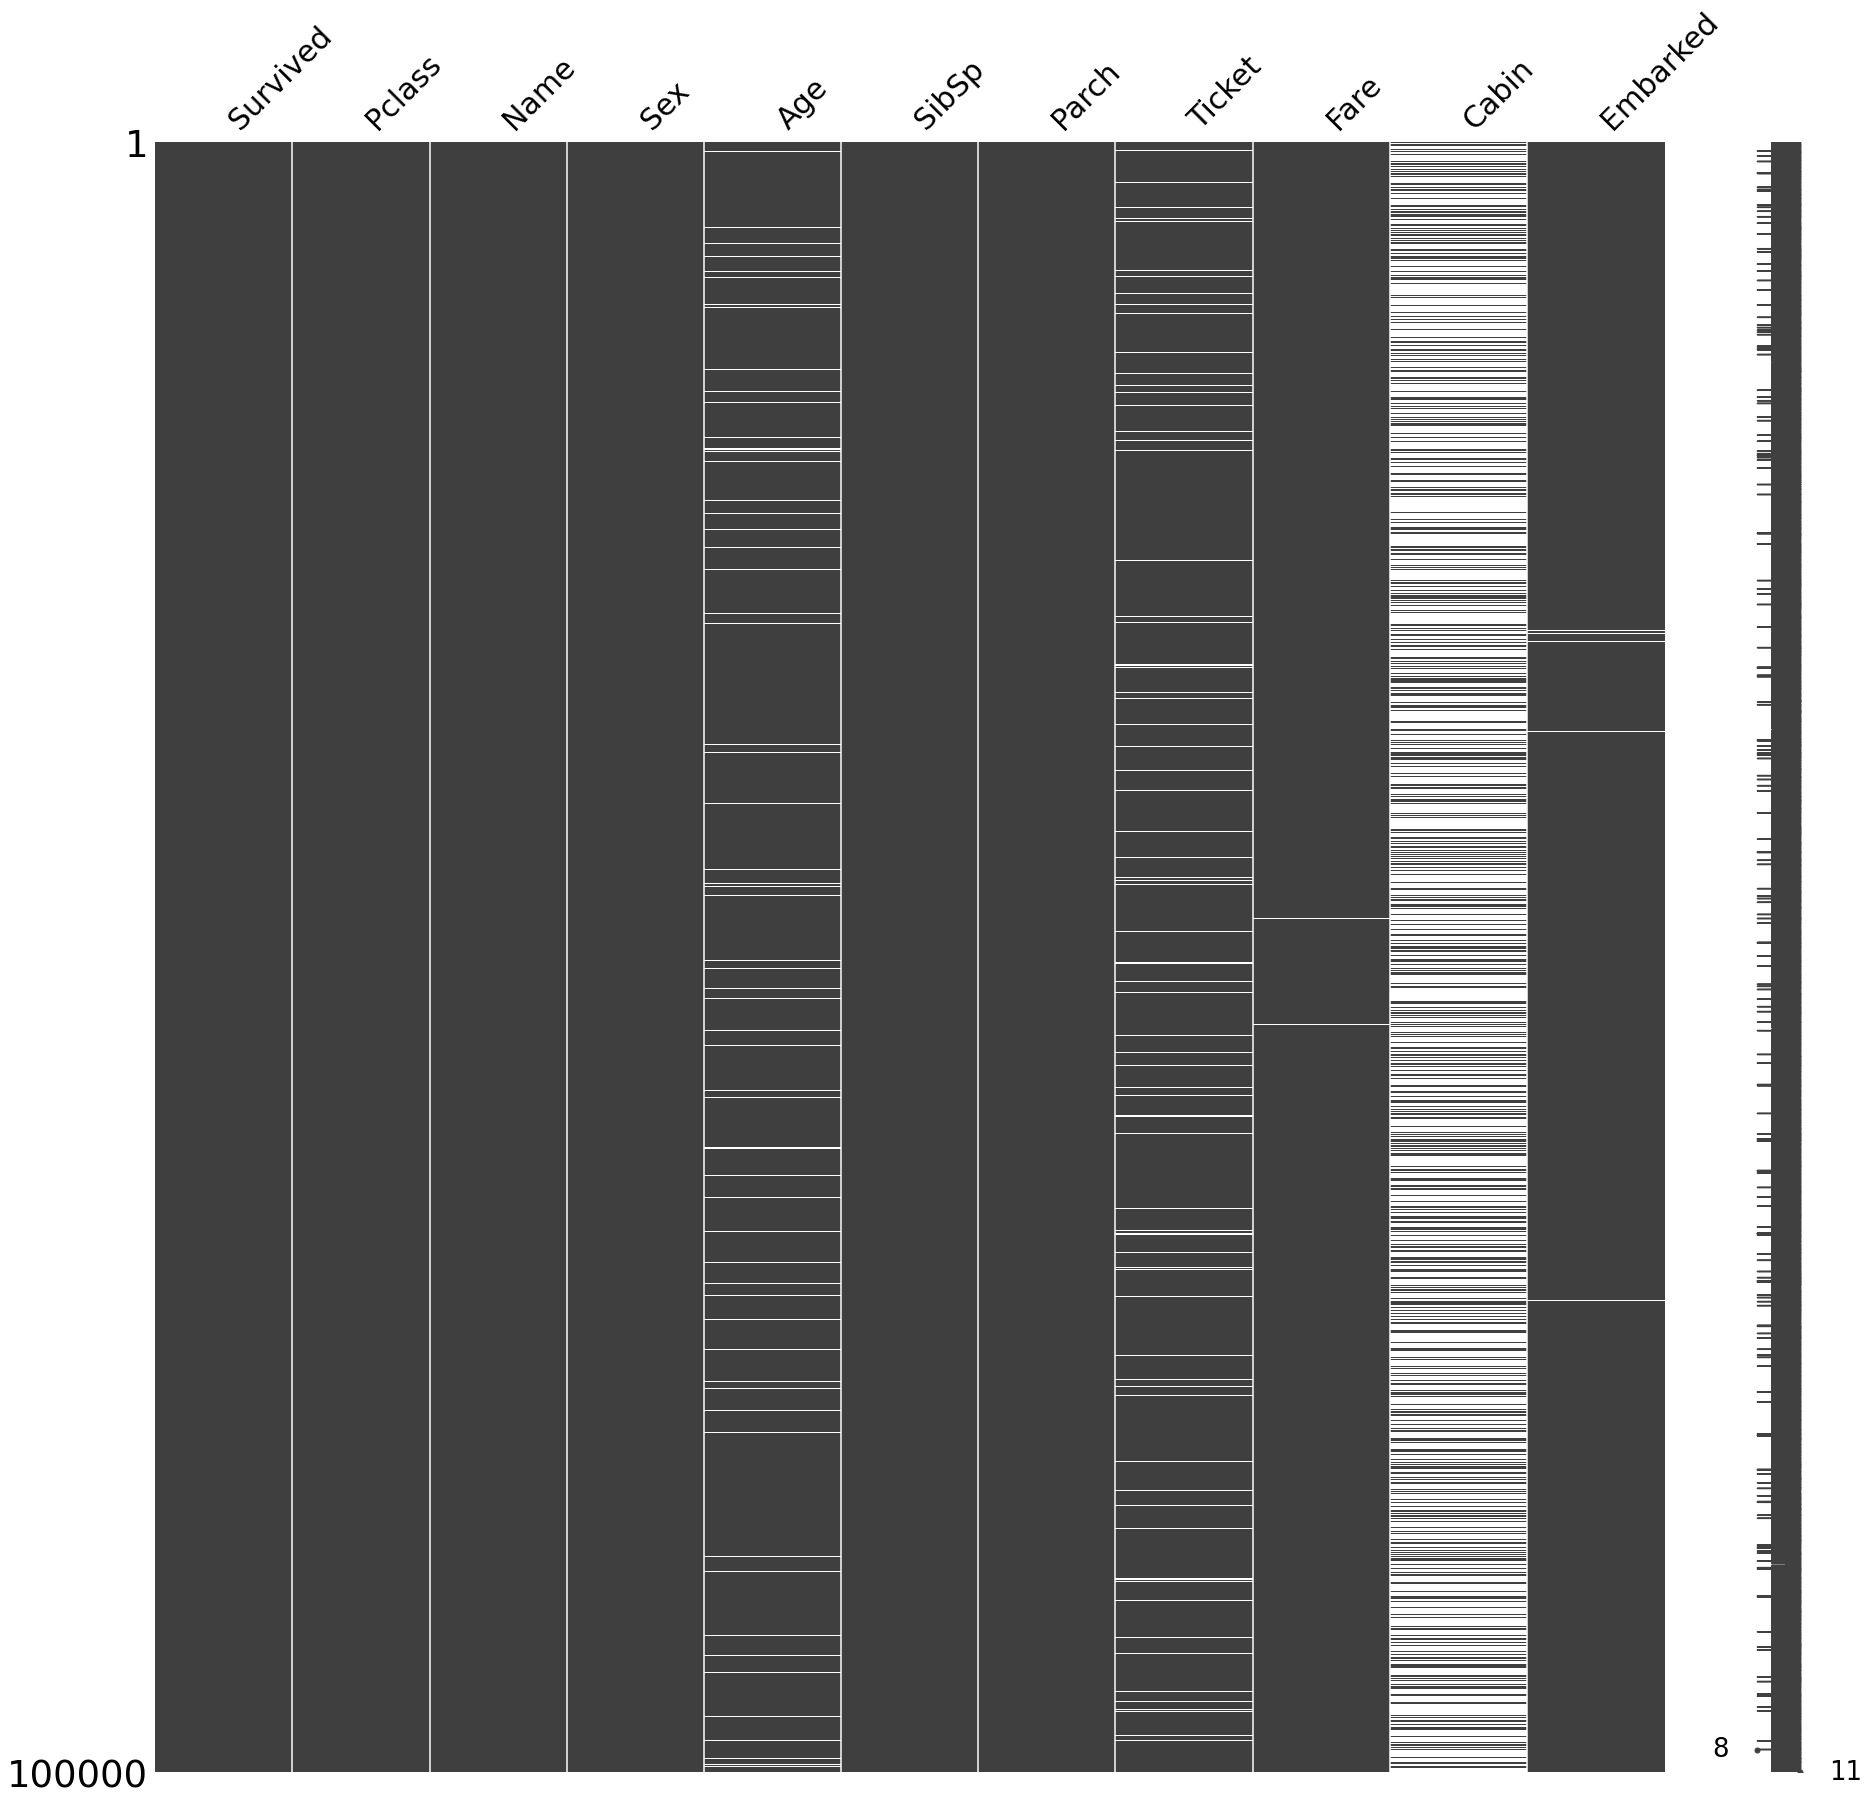

In [10]:
#visualization of NaN values for each column to see how they are distributed in dataframe
msno.matrix(tit_data, figsize=(30, 30), fontsize=30)

In [11]:
# sparkline on the right gives the row with maximum (8) and minimum number (11) of NaN values

<AxesSubplot:>

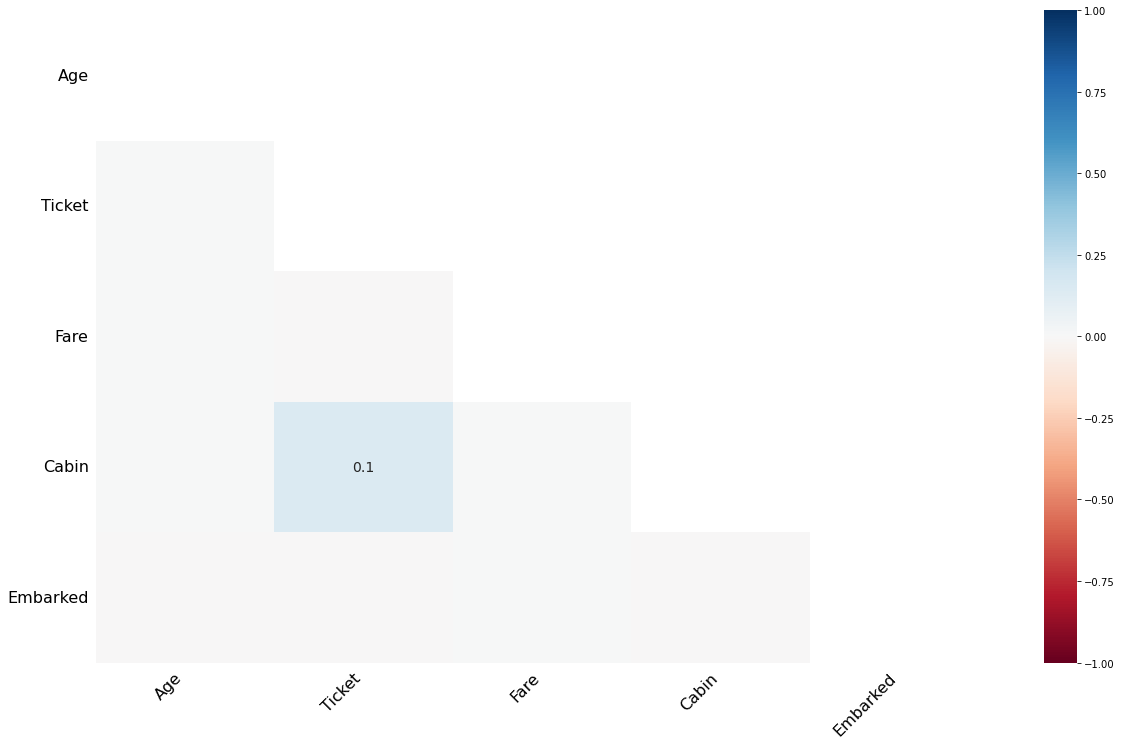

In [12]:
# to identify correlations of NaN values between each of the different column
# (how strongly the presence or absence of one variable affects the presence of another)
# if a value is close to 1 then NaN value in one column correlates with the presence of NaN value in the other one
# -1 => NaN value in one column correlates with the absence of NaN value in the other one
msno.heatmap(tit_data)

In [13]:
# since mostly the values on a heatmap is 0, it means that there is apparently no strong correlation
# between the occurence of NaN values across columns

<AxesSubplot:>

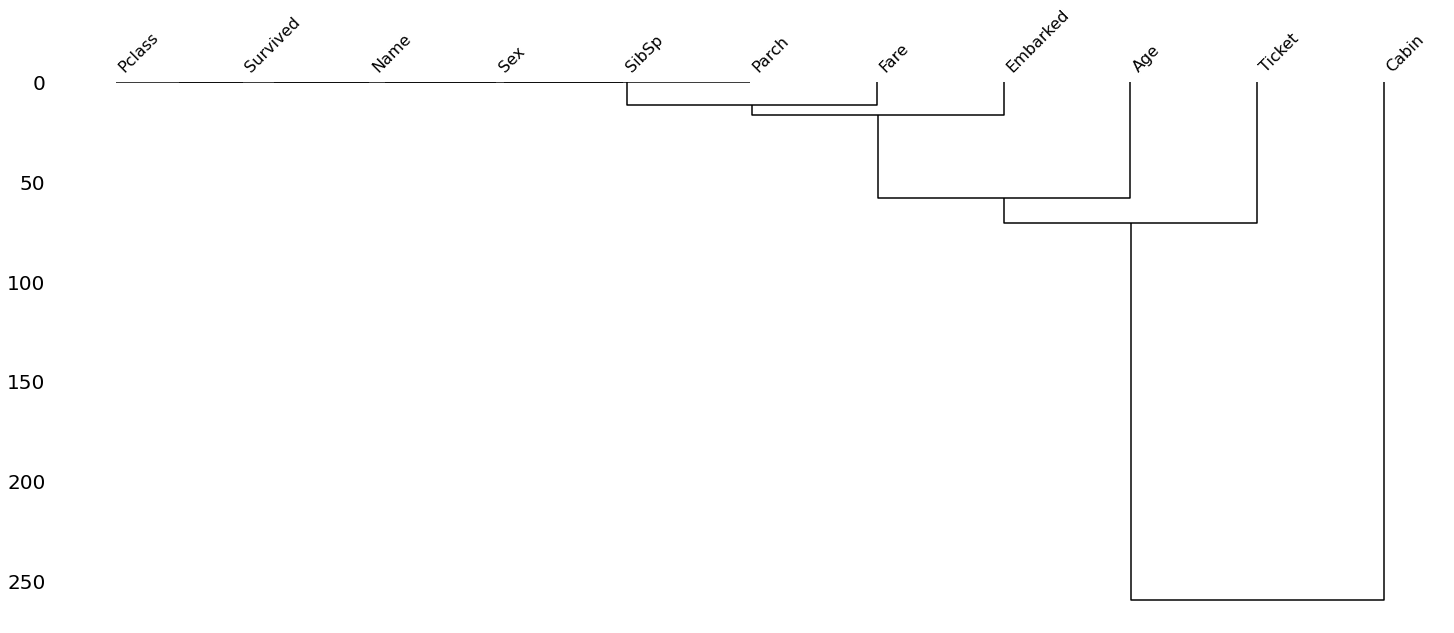

In [14]:
# grouping together columns that have stronger correlation in the presence of NaN values (more detailed visualization of correlation than heatmap)
msno.dendrogram(tit_data)

In [15]:
# The above graph shows that "Survived", "Pclass", "Name", "Sex", "SibSp", and "Parch" are grouped at 0, since they are complete.
# "Cabin" is the separate entry having the most number of NaN values.
# There could be some correlation between the presence of NaN values in "Fare" with the columns grouped at 0, as well as NaN in "Embarked" and "Fare",
# a slightly higher correlation is seen between Nan in "Age" and "Embarked", NaN in "Ticket" and "Age", 
# the highest correlation is between NaN in "Cabin" and "Ticket", which is also shown on heatmap.

In [16]:
# From above it's mostly certain that NaN values in one column are quite random but may depend on the values from other columns.
# That's why removing is not a correct way to handle them, since we'll lose values from other columns and thus the distribution could change.
# Two of the columns with missing data "Age" and "Fare" are of a float24 datatype:
# NaN for "Fare" we'll impute by mean;
# For now we won't do anything with NaN in "Age" , we'll come back to it later
# For "Ticket" and "Cabin" that are of object datatype, we'll replace NaN values with 'U' string = unknown, later after some intial EDA
# For "Embarked" we'll impute by the most frequent port of embarkation.
# plus for each column with NaN values, which we imputed, we'll add additional columns to the dataframe to indicate whether the value was given or imputed 
tit_data['FareIsNaN'] = tit_data['Fare'].isnull()
tit_data['EmbarkedIsNaN'] = tit_data['Embarked'].isnull()
tit_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareIsNaN,EmbarkedIsNaN
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,False,False
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,False,False
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,False,False
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,False,False
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,False,False
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,False,False
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,False,False
99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S,False,False


In [17]:
# imputation + replacement
tit_data["Fare"] = tit_data["Fare"].replace(np.NaN, tit_data["Fare"].mean())
tit_data["Embarked"] = tit_data['Embarked'].fillna(tit_data['Embarked'].value_counts().index[0])
tit_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareIsNaN,EmbarkedIsNaN
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,False,False
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,False,False
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,False,False
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,False,False
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,False,False
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,False,False
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,False,False
99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S,False,False


In [18]:
# verify missing values
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Survived       100000 non-null  int64  
 1   Pclass         100000 non-null  int64  
 2   Name           100000 non-null  object 
 3   Sex            100000 non-null  object 
 4   Age            96708 non-null   float64
 5   SibSp          100000 non-null  int64  
 6   Parch          100000 non-null  int64  
 7   Ticket         95377 non-null   object 
 8   Fare           100000 non-null  float64
 9   Cabin          32134 non-null   object 
 10  Embarked       100000 non-null  object 
 11  FareIsNaN      100000 non-null  bool   
 12  EmbarkedIsNaN  100000 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 8.6+ MB


# Data exploration

In [19]:
tit_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,100000.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.54218
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.49000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.56000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [20]:
# From above we can see that on average around 43% of passengers survived iceberg hit.
# The oldest person on Titanic was 87 years old, the youngest was 0,08 years old.
# On average ticket costed ~44$ with the ~745$ and 0,68$ as its maximum and minimum value.

In [21]:
# get the total number of survived and not survived passengers
surv_numb = tit_data.groupby('Survived')['Survived'].count()
surv_numb

Survived
0    57226
1    42774
Name: Survived, dtype: int64

([<matplotlib.patches.Wedge at 0x125c7f580>,
 [Text(0.20998789545467864, 1.0797708478017523, 'female'),
  Text(-0.20998789545467925, -1.0797708478017523, 'male')],
 [Text(0.11453885206618833, 0.5889659169827739, '44%'),
  Text(-0.11453885206618866, -0.5889659169827739, '56%')])

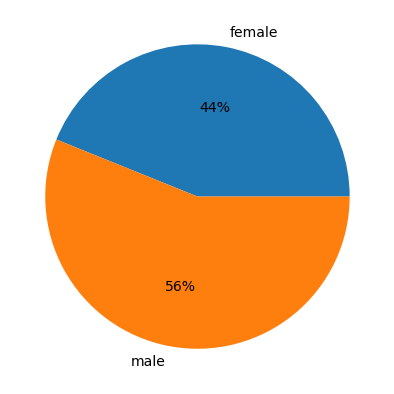

In [22]:
# get the percentage of women/men
sex_percent = tit_data.groupby('Sex')['Sex'].count()
plt.figure(figsize=(7,7))
plt.pie(sex_percent, labels = ['female', 'male'],autopct='%.0f%%', textprops={'fontsize': 14})

In [23]:
# there were more men than women on board

([<matplotlib.patches.Wedge at 0x125e64a60>,
 [Text(0.6377256168583579, 0.8962734167666846, '1st class'),
  Text(-1.03853717094496, 0.3625472997632711, '2nd class'),
  Text(0.3066911371571331, -1.0563808718399177, '3rd class')],
 [Text(0.34785033646819524, 0.48887640914546426, '30%'),
  Text(-0.5664748205154326, 0.19775307259814784, '29%'),
  Text(0.16728607481298166, -0.5762077482763187, '41%')])

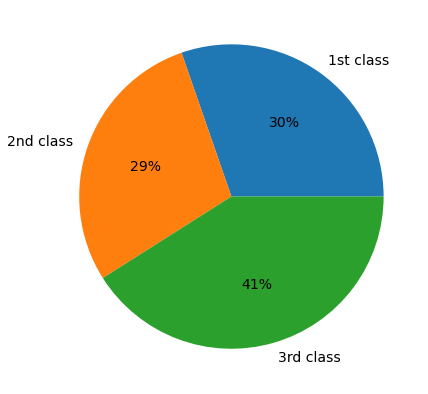

In [25]:
# get the percentage of people preferred a certain passenger class
class_percent = tit_data.groupby('Pclass')['Pclass'].count()
plt.figure(figsize=(7,7))
plt.pie(class_percent, labels = ['1st class', '2nd class', '3rd class'], autopct='%.0f%%', textprops={'fontsize': 14}) 

In [26]:
# most people travelled in the 3rd class, number of passengers in the 1st and 2nd classes is almost the same

([<matplotlib.patches.Wedge at 0x128a8f520>,
 [Text(0.843430756342764, 0.7061335279216483, 'Cherbourg'),
  Text(0.006980538279755728, 1.0999778507248794, 'Queenstown'),
  Text(-0.7114716442259588, -0.8389327145024272, 'Southampton')],
 [Text(0.46005313982332574, 0.3851637425027172, '22%'),
  Text(0.0038075663344122146, 0.5999879185772069, '5%'),
  Text(-0.38807544230506835, -0.45759966245586936, '72%')])

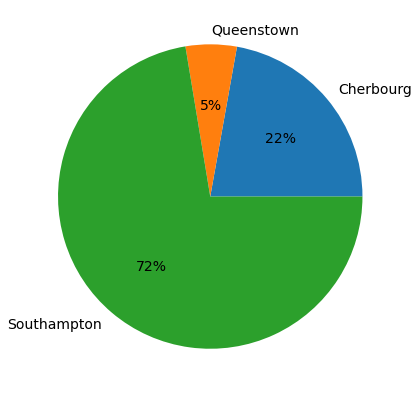

In [28]:
# get the percentage of people travelled from a certain port of embarkation
port_percent = tit_data.groupby('Embarked')['Embarked'].count()
plt.figure(figsize=(7,7))
plt.pie(port_percent, labels = ['Cherbourg', 'Queenstown', 'Southampton'], autopct='%.0f%%', textprops={'fontsize': 14})

In [29]:
# most of people embarked in Southampton, the least - in Queenstown

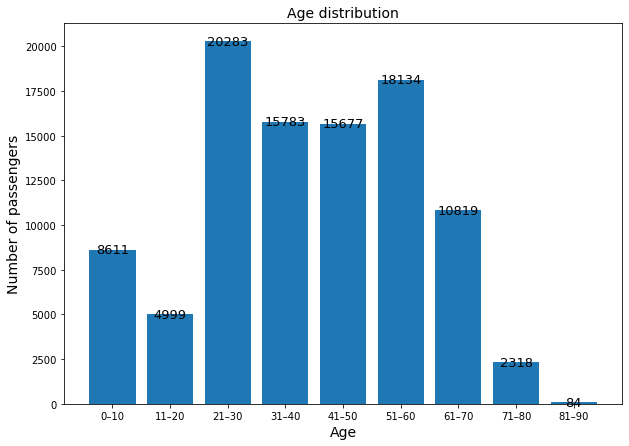

In [30]:
# get the age distrubution across passengers
plt.figure(figsize=(10,7))
ages = tit_data[tit_data['Age'].notnull()]['Age'].values
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']
plt.title('Age distribution', fontsize=14)
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)
for i, bar in zip(ages_hist[0], range(9)):
    plt.text(bar, i+3, str(int(i)), fontsize=13,
             horizontalalignment='center', verticalalignment='center')

In [31]:
# most of people were between 21-30 years old, least - of 81-90 (distribution is quite normal)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

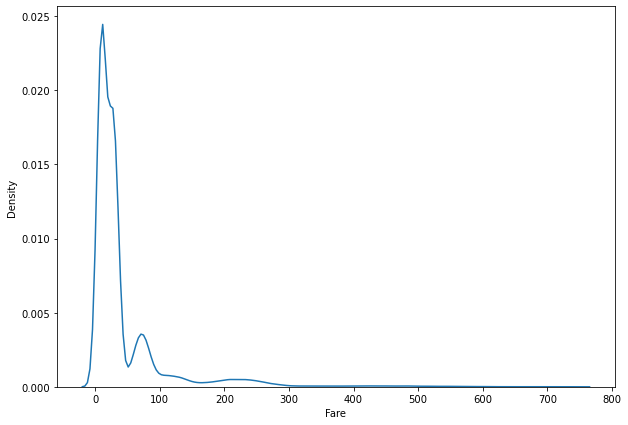

In [32]:
# get fare ditribution
plt.figure(figsize=(10,7))
sns.kdeplot(data=tit_data, x="Fare")

In [33]:
# mostly tickets has the price below 50$, ditribution is positively skewed

<BarContainer object of 8 artists>

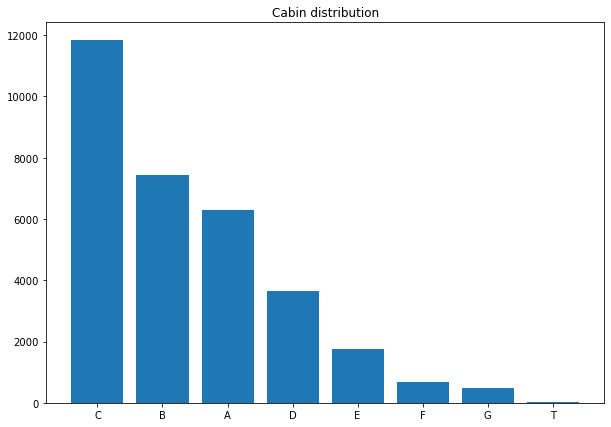

In [36]:
# get cabin distribution
plt.figure(figsize=(10,7))
cabins = tit_data['Cabin'].dropna()
def take_first_letter(x):
    return x[0]
cabins = cabins.apply(take_first_letter).value_counts()
plt.title('Cabin distribution')
plt.bar(cabins.index, cabins.values)

In [38]:
# most people were in 'C' cabins, leadt - in T, distribution is positively skewed

<AxesSubplot:xlabel='Cabin', ylabel='count'>

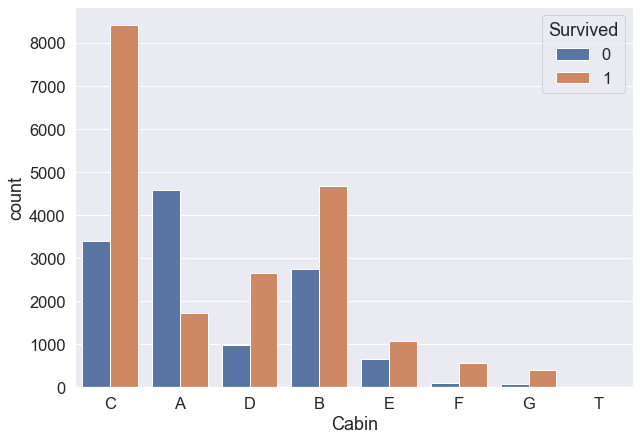

In [39]:
# compare number of survived and not survived people depending on their cabin
cabins = tit_data['Cabin'].dropna()
def take_first_letter(x):
    return x[0]
cabins = cabins.apply(take_first_letter)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x=cabins,hue = tit_data["Survived"],data = tit_data)

In [44]:
# only in cabins A amount of people died is higher than survived

In [45]:
tit_data['Cabin'].describe()

count      32134
unique     26992
top       C19828
freq           6
Name: Cabin, dtype: object

In [46]:
# there are 26992 unique cabin values, suggesting that some passengers travelled in the same cabin

In [47]:
tit_data['Ticket'].describe()

count     95377
unique    75331
top        A/5 
freq        602
Name: Ticket, dtype: object

In [42]:
# there are 75331 unique ticket values, suggesting that some passengers travelled under the same ticket

In [48]:
# now we can replace NaN values in "Cabin" and 'Ticket"
tit_data["Ticket"] = tit_data["Ticket"].fillna('U')
tit_data["Cabin"] = tit_data["Cabin"].fillna('U')
tit_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareIsNaN,EmbarkedIsNaN
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,False,False
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,U,S,False,False
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,U,S,False,False
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,U,S,False,False
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,U,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,False,False
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,U,S,False,False
99997,0,3,"Childress, Charles",male,37.00,0,0,U,9.95,U,S,False,False
99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,U,S,False,False


In [49]:
# verify NaN values
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Survived       100000 non-null  int64  
 1   Pclass         100000 non-null  int64  
 2   Name           100000 non-null  object 
 3   Sex            100000 non-null  object 
 4   Age            96708 non-null   float64
 5   SibSp          100000 non-null  int64  
 6   Parch          100000 non-null  int64  
 7   Ticket         100000 non-null  object 
 8   Fare           100000 non-null  float64
 9   Cabin          100000 non-null  object 
 10  Embarked       100000 non-null  object 
 11  FareIsNaN      100000 non-null  bool   
 12  EmbarkedIsNaN  100000 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 8.6+ MB


<AxesSubplot:xlabel='Sex', ylabel='count'>

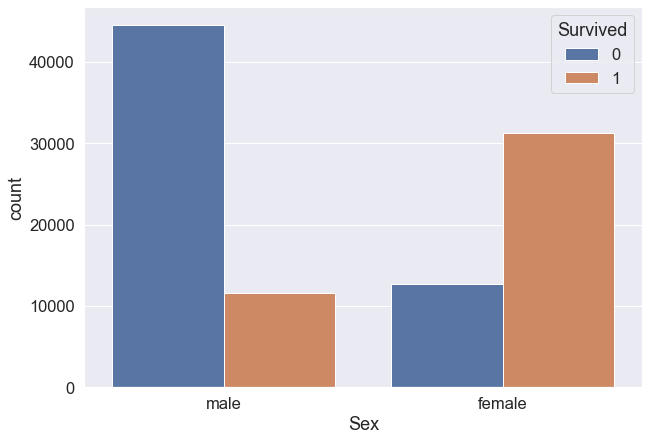

In [50]:
# compare number of survived and not survived people depending on their sex
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x=tit_data["Sex"],hue = tit_data["Survived"],data = tit_data)

In [51]:
# from above we can see that the number of women survived is higher than not survived, with men it's vice versa
# It's clear that percentage of survived women are far bigger than men. 
# This is due to the fact that women are always being first for the rescue.

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

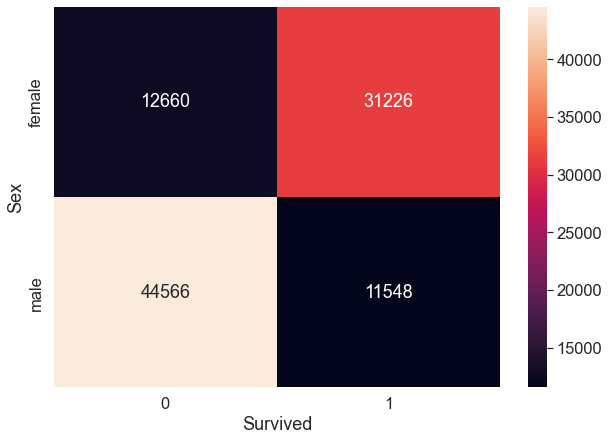

In [52]:
# to see the exact number of people survived and not survived depending on their sex
tit_data_by_sex_surv = tit_data.groupby(['Sex', 'Survived'])
sex_survived = tit_data_by_sex_surv.size().unstack()
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.heatmap(sex_survived, annot = True, fmt ="d")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

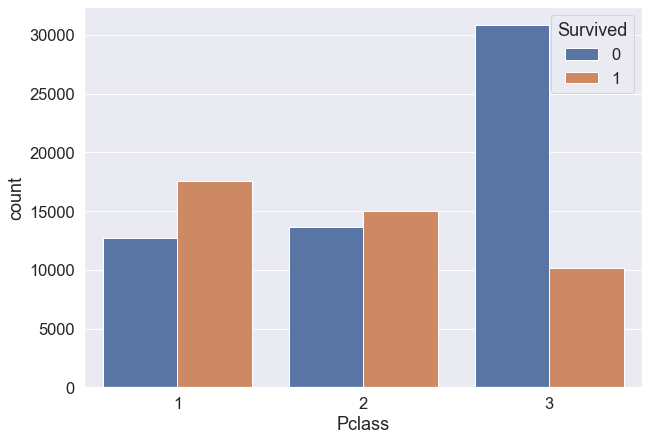

In [53]:
# compare number of survived and not survived people depending on their passenger class
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x=tit_data["Pclass"],hue = tit_data["Survived"],data = tit_data)

In [54]:
# The correlation is anticipated. Passengers in the top high class are being rescued first,
# and the number of people in the 3rd class died is the largest.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

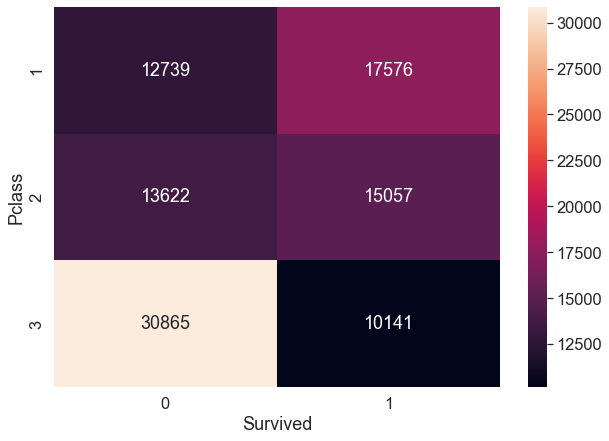

In [55]:
# to see the exact number of people survived and not survived depending on their passenger class
tit_data_by_class_surv = tit_data.groupby(['Pclass', 'Survived'])
class_survived = tit_data_by_class_surv.size().unstack()
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.heatmap(class_survived, annot = True, fmt ="d")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

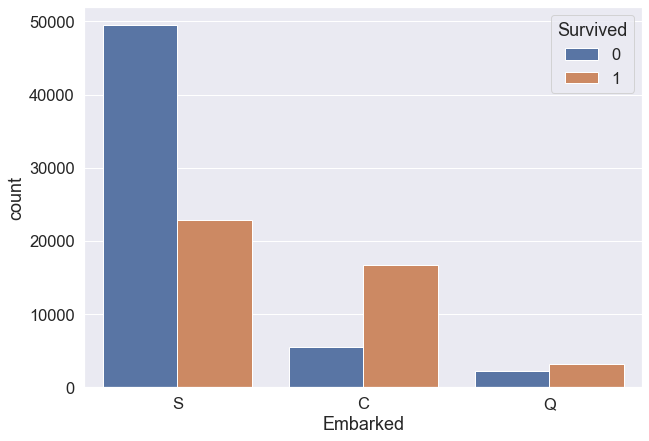

In [56]:
# compare number of survived and not survived people depending on their port of embarkation
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x=tit_data["Embarked"],hue = tit_data["Survived"],data = tit_data)

In [57]:
# most people survived embarked in Southampton, the least - in Queenstown
# also most people died also embarked in Southampton, the least  - in Queenstown
# it seems like overall port in Southampton is the largest one and takes more people on average

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

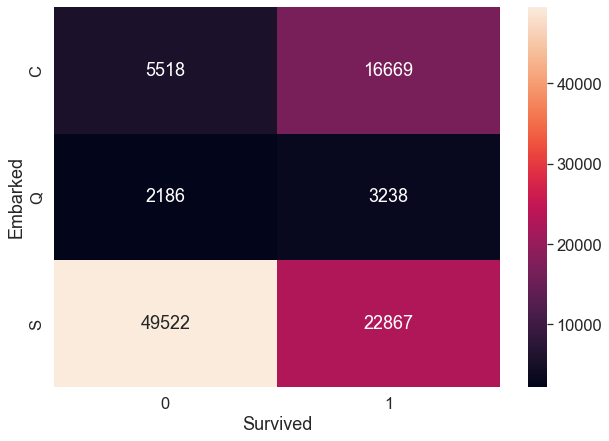

In [58]:
# to see the exact number of people survived and not survived depending on the port of embarkation
tit_data_by_port_surv = tit_data.groupby(['Embarked', 'Survived'])
port_survived = tit_data_by_port_surv.size().unstack()
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.heatmap(port_survived, annot = True, fmt ="d")

<Figure size 1440x720 with 0 Axes>

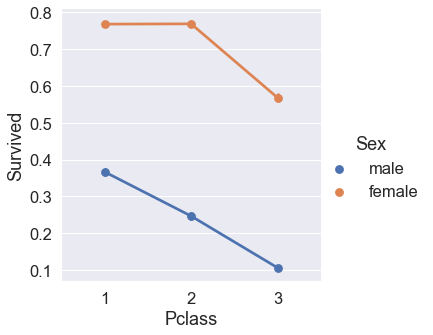

In [59]:
# to determine if women are always being rescued first irrespective of their passenger class
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=tit_data, kind='point')

In [60]:
# the graph above proves that irrespective of the class women are always being rescued first

Text(0.5, 1.0, 'Sex and Age vs Survived')

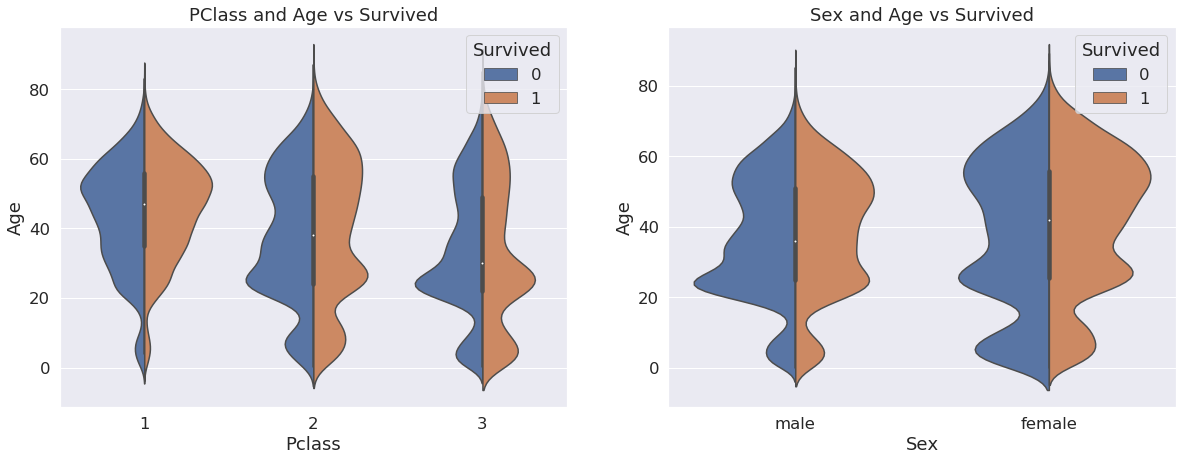

In [85]:
# to see correlation between survival rate depending on passenger class and age, sex and age
f,ax=plt.subplots(1,2,figsize=(20,7))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=tit_data,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
sns.violinplot(x="Sex",y="Age", hue="Survived", data=tit_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

In [61]:
# From above we can deduce that number of children is bigger in lower classes.
# Women rescued are more at the age between 40 and 60 years, similar tendency is also visible in men.
# Number of people of different age survived are a bit less in PClass 2 and 3 than died, but not 1 (almost the same here).
# There are more men died at the age of around 25 years old than survived, the survival increases with the age.
# There are more women died at the age of around 5 years old than survived, from the age 25 the survival rate increases.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

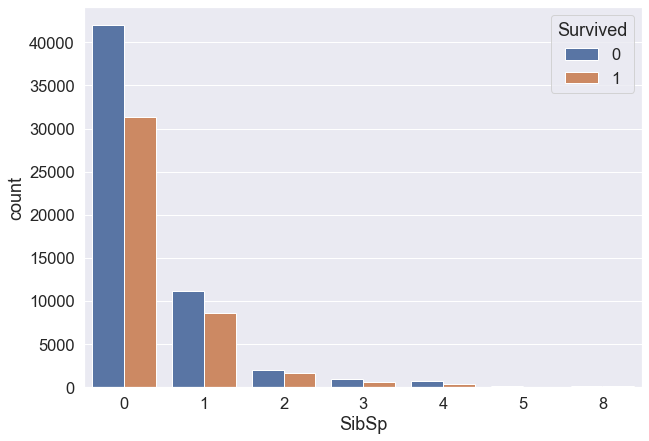

In [62]:
# compare number of survived and not survived people depending on how many sibllings/partners they have
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x=tit_data["SibSp"],hue = tit_data["Survived"],data = tit_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

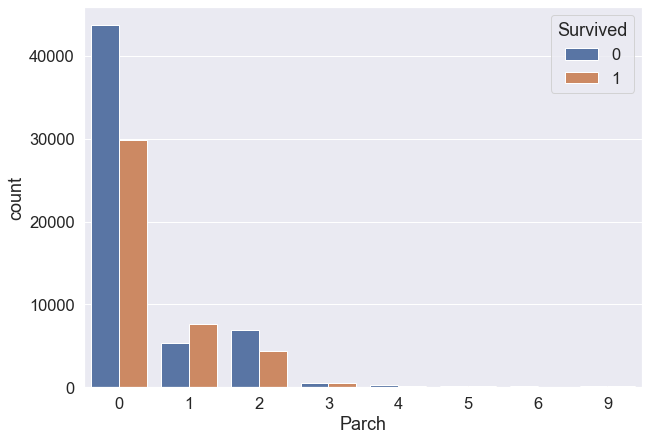

In [63]:
# compare number of survived and not survived people depending on how many parents/children they have
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x=tit_data["Parch"],hue = tit_data["Survived"],data = tit_data)

In [64]:
# according to two graphs from above, most of passengers travelled alone 
# plus having either 1 parent or 1 kid was the only case that led to a higher possibility of survival

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

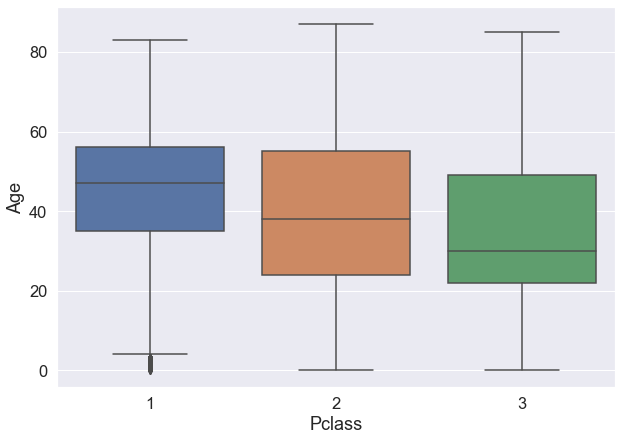

In [65]:
# handling "Age" NaN values
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.boxplot(x='Pclass',y='Age',data=tit_data)

In [66]:
# there is some dependency between age and passenger class, that's why 
# from the graph above we can take approximate mean values of age:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 50
        elif Pclass == 2:
            return 39
        else:
            return 30
    else:
        return Age
tit_data['Age'] = tit_data[['Age', 'Pclass']].apply(age, axis=1)
tit_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareIsNaN,EmbarkedIsNaN
0,1,1,"Oconnor, Frankie",male,50.00,2,0,209245,27.14,C12239,S,False,False
1,0,3,"Bryan, Drew",male,30.00,0,0,27323,13.35,U,S,False,False
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,U,S,False,False
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,U,S,False,False
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,U,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,False,False
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,U,S,False,False
99997,0,3,"Childress, Charles",male,37.00,0,0,U,9.95,U,S,False,False
99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,U,S,False,False


In [67]:
# verify missing values
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Survived       100000 non-null  int64  
 1   Pclass         100000 non-null  int64  
 2   Name           100000 non-null  object 
 3   Sex            100000 non-null  object 
 4   Age            100000 non-null  float64
 5   SibSp          100000 non-null  int64  
 6   Parch          100000 non-null  int64  
 7   Ticket         100000 non-null  object 
 8   Fare           100000 non-null  float64
 9   Cabin          100000 non-null  object 
 10  Embarked       100000 non-null  object 
 11  FareIsNaN      100000 non-null  bool   
 12  EmbarkedIsNaN  100000 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 8.6+ MB


In [68]:
# in the end we didn't really need columns 'FareIsNaN', 'EmbarkedIsNaN', and "Name", so we'll just drop it:
tit_data = tit_data.drop('FareIsNaN', axis = 1)
tit_data = tit_data.drop('EmbarkedIsNaN', axis = 1)
tit_data = tit_data.drop('Name', axis = 1)
tit_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,male,50.00,2,0,209245,27.14,C12239,S
1,0,3,male,30.00,0,0,27323,13.35,U,S
2,0,3,male,0.33,1,2,CA 457703,71.29,U,S
3,0,3,male,19.00,0,0,A. 10866,13.04,U,S
4,1,3,male,25.00,0,0,427635,7.76,U,S
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,male,66.00,0,0,13273,11.15,U,S
99997,0,3,male,37.00,0,0,U,9.95,U,S
99998,0,3,male,51.00,0,1,458654,30.92,U,S


# Summary

In [ ]:
# EDA of titanic dataset revealed quite logical correlations,
# such as women are rescued first, as weel as passengers in the 1st class.
# There're some clear indicators of which port is the busiest (S) one, and where people tend to settle (cabin C) on board.
# We saw percentages of people belonging to different classes and sexes.